In [2]:
import pandas as pd
df = pd.read_csv("../dataset/processed_logs.csv")


In [3]:
features = ["bbox_area", "aspect_ratio", "dx", "dy",
            "height", "temp", "speed_x", "speed_y", "speed_z", "battery"]
X = df[features]
y = df["action_encoded"]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           1       0.86      0.95      0.90        20
           2       1.00      0.33      0.50         3
           3       0.50      0.50      0.50         2

    accuracy                           0.84        25
   macro avg       0.79      0.59      0.63        25
weighted avg       0.85      0.84      0.82        25



<Axes: xlabel='action'>

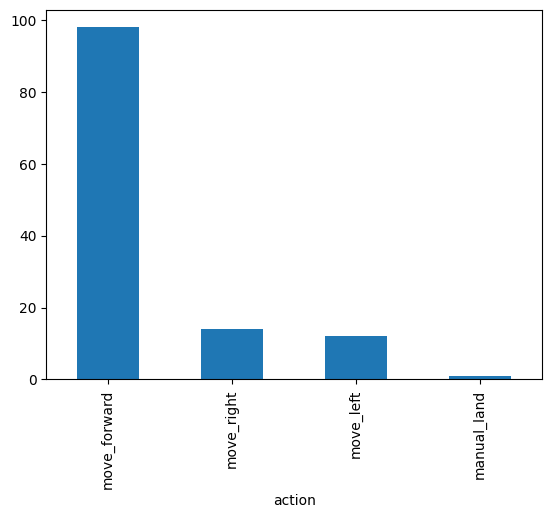

In [6]:
df["action"].value_counts().plot(kind="bar")


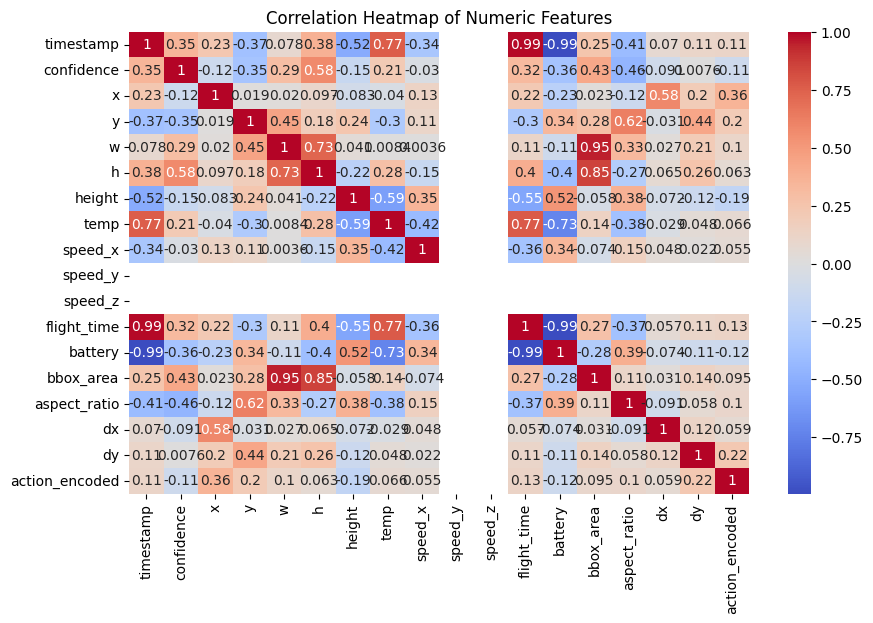

In [10]:
numeric_df = df.select_dtypes(include=["number"])


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [12]:
import pandas as pd
import numpy as np
import joblib

# Paths
train_path = "../data/train.csv"
val_path = "../data/val.csv"
test_path = "../data/test.csv"

# Load splits
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)




ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- battery
- confidence
- flight_time
- temp
Feature names seen at fit time, yet now missing:
- detected
